# TomoPy with native algorithms: gridrec, MLEM, SIRT, ...

Notebook source: https://tomopy.readthedocs.io/en/latest/ipynb/tomopy.html

In [1]:
import dxchange
import matplotlib.pyplot as plt
import numpy as np
import tomopy
import logging
import time
#logging.basicConfig(level=logging.INFO)

In [2]:
proj, flat, dark, theta = dxchange.read_aps_32id(
    fname='/mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/tomorec/tooth.h5',
    sino=(0, 2),
)
proj = tomopy.normalize(proj, flat, dark)
rot_center = 296
proj = tomopy.minus_log(proj)

In [3]:
# auxillairy function to store timing result

def add_tm_result(db, name, t, overwrite=False):
    if (not overwrite) and name in db.keys():
        db[name] = t if t<=db[name] else db[name]
    else:
        db[name] = t
    return tm_db

tm_db = {}

### gridrec

Note: **<span style="color:red">repeat the cell below at least twice !!!</span>**

In [42]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='gridrec',
                     sinogram_order=False)

tm_db = add_tm_result(tm_db, 'gridrec', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 61.6 ms, sys: 2.94 ms, total: 64.6 ms
Wall time: 33.8 ms


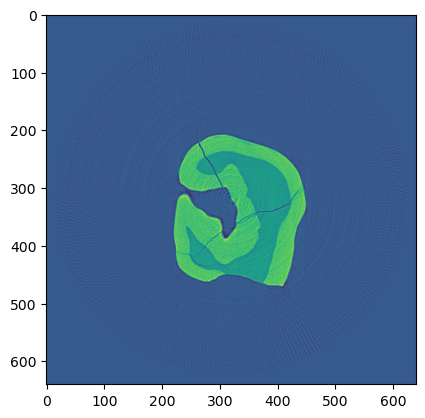

In [5]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### gridrec with filter

In [43]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='gridrec',
                     filter_name='parzen',
                     sinogram_order=False)

tm_db = add_tm_result(tm_db, 'gridrec-filter', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 62.6 ms, sys: 951 µs, total: 63.6 ms
Wall time: 33.2 ms


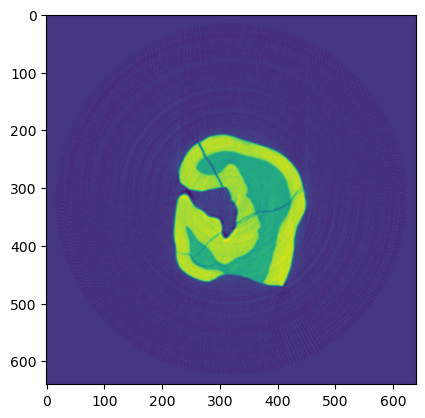

In [7]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### ART

In [8]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='art',
                     num_iter=10,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'ART', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 18 s, sys: 37.5 ms, total: 18.1 s
Wall time: 17.8 s


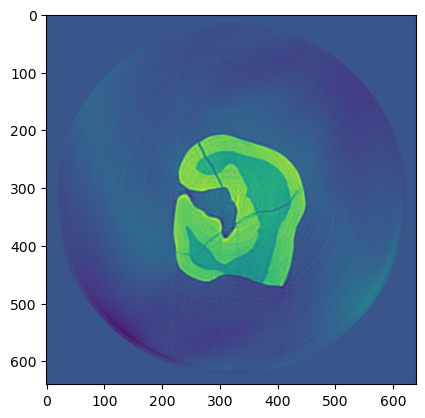

In [9]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### BART

In [10]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='bart',
                     num_iter=64,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'BART', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 3min 28s, sys: 297 ms, total: 3min 28s
Wall time: 1min 45s


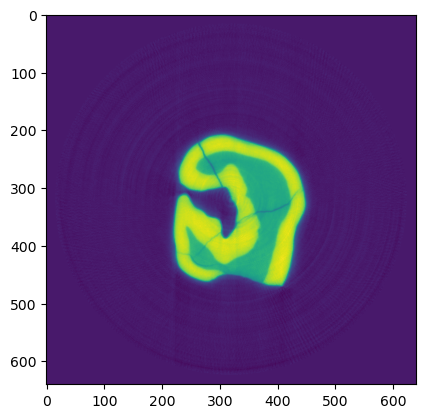

In [11]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### OSEM

In [12]:
%%time

proj_nn = proj.copy()
proj_nn[proj_nn < 0] = 0  # no values less than zero with OSEM

CPU times: user 9.72 ms, sys: 7 µs, total: 9.73 ms
Wall time: 1.15 ms


In [13]:
%%time

start = time.time()

recon = tomopy.recon(proj_nn,
                     theta,
                     center=rot_center,
                     algorithm='osem',
                     num_iter=32,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'OSEM', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 1min 41s, sys: 82.8 ms, total: 1min 41s
Wall time: 51.8 s


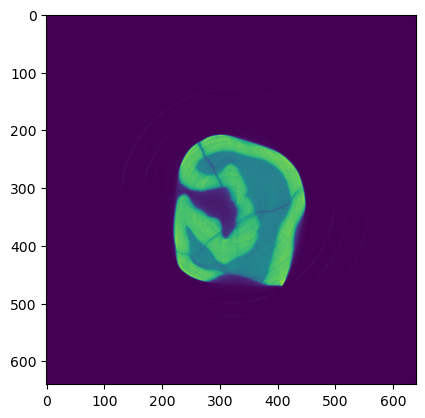

In [14]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### PML

In [15]:
%%time

start = time.time()

recon = tomopy.recon(proj_nn,
                     theta,
                     center=rot_center,
                     algorithm='pml_hybrid',
                     num_iter=32,
                     ncore=2) # reg_par?

tm_db = add_tm_result(tm_db, 'PML_hybrid', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 1min 46s, sys: 153 ms, total: 1min 46s
Wall time: 53.2 s


In [16]:
%%time

start = time.time()

recon = tomopy.recon(proj_nn,
                     theta,
                     center=rot_center,
                     algorithm='pml_quad',
                     num_iter=32,
                     ncore=2) # reg_par?

tm_db = add_tm_result(tm_db, 'PML_quad', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 1min 44s, sys: 172 ms, total: 1min 44s
Wall time: 52.7 s


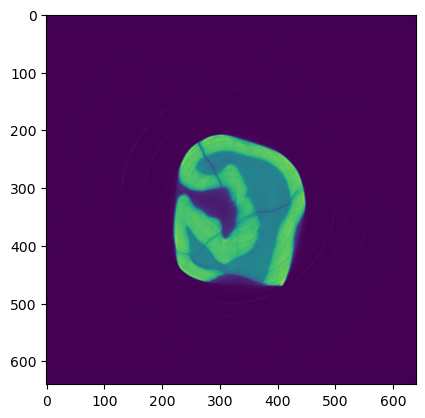

In [17]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### OSPML

In [18]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='ospml_hybrid',
                     num_iter=64,
                     ncore=2) # reg_par ?

tm_db = add_tm_result(tm_db, 'OSPML_hybrid', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 3min 34s, sys: 343 ms, total: 3min 35s
Wall time: 1min 48s


In [ ]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='ospml_quad',
                     num_iter=64,
                     reg_par=0.10,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'OSPML_quad', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...


In [ ]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### tv

In [21]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='tv',
                     reg_par=5e-4,
                     num_iter=128,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'TV', time.time()-start);

CPU times: user 6min 54s, sys: 432 ms, total: 6min 54s
Wall time: 3min 27s


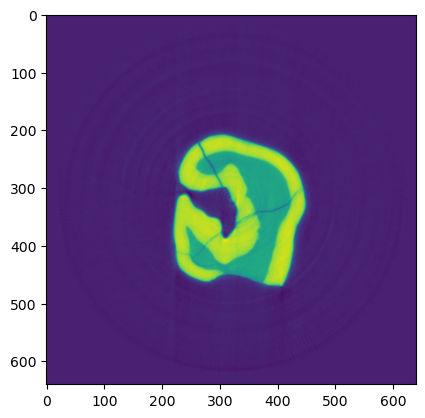

In [22]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### grad

In [23]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='grad',
                     reg_par=-1, # 0.5
                     num_iter=32,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'GRAD', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 1min 42s, sys: 119 ms, total: 1min 43s
Wall time: 51.4 s


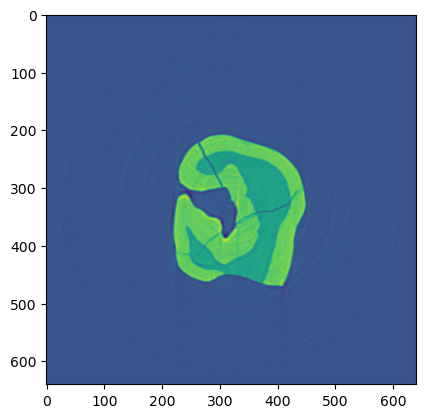

In [24]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### tikh

In [25]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm='tikh',
                     num_iter=64,
                     reg_par=0.50,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'TIKH', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 3min 27s, sys: 310 ms, total: 3min 27s
Wall time: 1min 44s


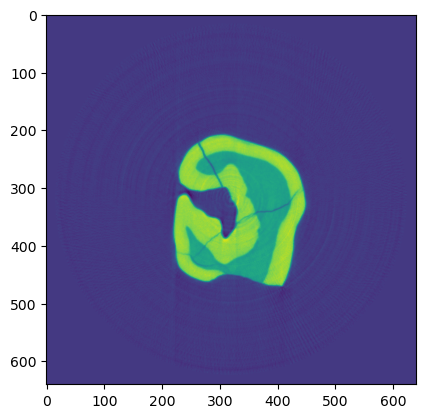

In [26]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Center projections for tomopy SIRT and MLEM algorithms

In [27]:
%%time

# center projections
proj_centered = proj.copy()

if (rot_center<proj.shape[-1]//2):
    npad = int(proj.shape[-1] - 2*rot_center + 0.5)
    proj_centered = np.concatenate((np.zeros(proj.shape[:-1]+(npad,),dtype=proj.dtype),proj),axis=proj.ndim-1)
else:
    npad = int(2*rot_center - proj.shape[-1] + 0.5)
    proj_centered = np.concatenate((proj,np.zeros(proj.shape[:-1]+(npad,),dtype=proj.dtype)),axis=proj.ndim-1)

CPU times: user 5.7 ms, sys: 9 µs, total: 5.71 ms
Wall time: 656 µs


### MLEM

In [28]:
%%time

proj_centered_em = proj_centered.copy()
proj_centered_em[proj_centered_em < 0] = 0  # no values less than zero with EM

CPU times: user 5.19 ms, sys: 1.99 ms, total: 7.18 ms
Wall time: 886 µs


#### MLEM no-accel

In [29]:
%%time

start = time.time()

# Reconstruct object using CPU accelerated algorithm.
recon = tomopy.recon(proj_centered_em,
                     theta,
                     algorithm='mlem',
                     num_iter=32,
                     accelerated=False,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'mlem', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 2min, sys: 119 ms, total: 2min
Wall time: 1min 1s


#### MLEM accel

Documentation: https://tomopy.readthedocs.io/en/latest/gpu.html#

In [44]:
%%time

start = time.time()

# Reconstruct object using CPU accelerated algorithm.
recon = tomopy.recon(proj_centered_em,
                     theta,
                     algorithm='mlem',
                     num_iter=32,
                     accelerated=True,
                     device='cpu',
                     ncore=1,
                     pool_size=3)

tm_db = add_tm_result(tm_db, 'mlem-accel-cpu', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 3.09 s, sys: 2.75 s, total: 5.84 s
Wall time: 2.46 s


Note: **<span style="color:red">repeat the cell below at least twice !!!</span>**

In [46]:
%%time

start = time.time()

recon = tomopy.recon(proj_centered_em,
                     theta,
                     algorithm='mlem',
                     num_iter=32,
                     accelerated=True,
                     device='gpu',
                     ncore=1,
                     pool_size=3)

tm_db = add_tm_result(tm_db, 'mlem-accel-gpu', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 3.1 s, sys: 2.8 s, total: 5.9 s
Wall time: 2.49 s


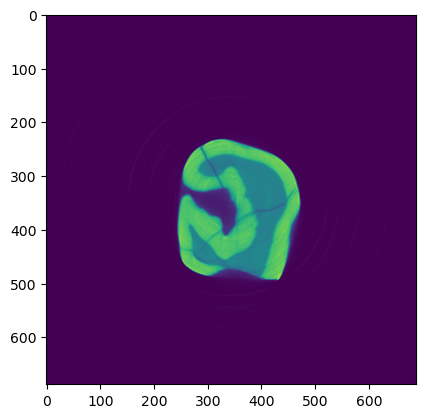

In [32]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using SIRT

#### SIRT no-accel

In [33]:
%%time

start = time.time()

# Reconstruct object using CPU accelerated algorithm.
recon = tomopy.recon(proj_centered,
                     theta,
                     algorithm='sirt',
                     num_iter=128,
                     accelerated=False,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'sirt', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 8min 2s, sys: 767 ms, total: 8min 3s
Wall time: 4min 2s


#### SIRT accel

In [47]:
%%time

start = time.time()

# Reconstruct object using GPU accelerated algorithm.
recon = tomopy.recon(proj_centered,
                     theta,
                     algorithm='sirt',
                     num_iter=128,
                     accelerated=True,
                     device='cpu',
                     ncore=1,
                     pool_size=3)

tm_db = add_tm_result(tm_db, 'sirt-accel-cpu', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 12.4 s, sys: 10.4 s, total: 22.7 s
Wall time: 9.09 s


Note: **<span style="color:red">repeat the cell below at least twice !!!</span>**

In [51]:
%%time

start = time.time()

# Reconstruct object using GPU accelerated algorithm.
recon = tomopy.recon(proj_centered,
                     theta,
                     algorithm='sirt',
                     num_iter=128,
                     accelerated=True,
                     device='gpu',
                     ncore=1,
                     pool_size=3)

tm_db = add_tm_result(tm_db, 'sirt-accel-gpu', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 12.2 s, sys: 10.2 s, total: 22.5 s
Wall time: 9.17 s


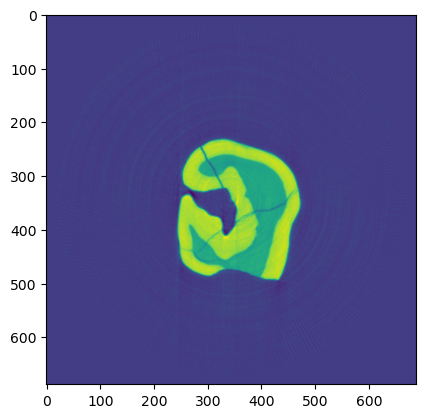

In [36]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

#### SIRT with interpolation

Note: **<span style="color:red">repeat the cell below at least twice !!!</span>**

In [53]:
%%time

start = time.time()

# Reconstruct object using GPU accelerated algorithm.
recon = tomopy.recon(proj_centered,
                     theta,
                     algorithm='sirt',
                     interpolation='cubic',
                     num_iter=128,
                     accelerated=True,
                     device='gpu',
                     ncore=1,
                     pool_size=3)

tm_db = add_tm_result(tm_db, 'sirt-accel-gpu-cubic', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 15.9 s, sys: 12 s, total: 27.9 s
Wall time: 11 s


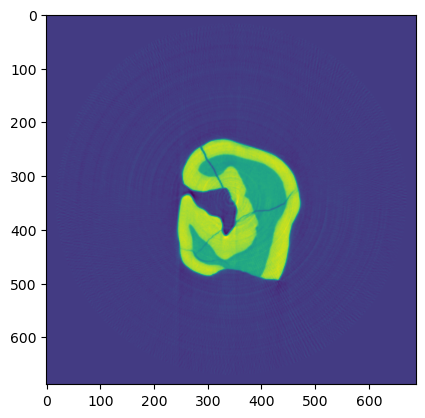

In [38]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

In [55]:
print("%20s\t %10s" % ('algorithm','time (msec)',))
print("---------------------------------------------")

for name in tm_db.keys():
    print("%20s\t %10.0f" % (name,tm_db[name]*1000,))

           algorithm	 time (msec)
---------------------------------------------
             gridrec	         34
      gridrec-filter	         33
                 ART	      17817
                BART	     105555
                OSEM	      51751
          PML_hybrid	      53195
            PML_quad	      52723
        OSPML_hybrid	     108786
          OSPML_quad	     107163
                  TV	     207805
                GRAD	      51441
                TIKH	     104812
                mlem	      61025
      mlem-accel-cpu	       2459
      mlem-accel-gpu	       2433
                sirt	     242158
      sirt-accel-cpu	       9093
      sirt-accel-gpu	       9090
sirt-accel-gpu-cubic	      10933


In [56]:
import json
with open('tooth_native.json','w') as fid:
    json.dump(tm_db,fid)